In [91]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd

In [92]:
Company_Name = []
href = []

In [93]:
web = "https://www.ycombinator.com/companies?batch=W24"
driver = webdriver.Chrome()
driver.get(web)
driver.maximize_window()
time.sleep(3)

prev_height = driver.execute_script('return document.body.scrollHeight')

while True:
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    time.sleep(3)
    new_height = driver.execute_script('return document.body.scrollHeight')
    if new_height == prev_height:
        break
    prev_height = new_height
    
container = driver.find_element(By.XPATH, "//div[contains(@class, '_section_99gj3_146 _results_99gj3_327')]")
products = container.find_elements(By.CLASS_NAME, "_company_99gj3_339")

for product in products:
    href.append(product.get_attribute("href"))
    name = product.find_element(By.CLASS_NAME, "_coName_99gj3_454")
    Company_Name.append(name.text)
driver.quit()


df = pd.DataFrame({'Company':Company_Name, 'link':href})
print(df)

                 Company                                               link
0               Alacrity     https://www.ycombinator.com/companies/alacrity
1              ParcelBio    https://www.ycombinator.com/companies/parcelbio
2           K-Scale Labs  https://www.ycombinator.com/companies/k-scale-...
3              Marr Labs    https://www.ycombinator.com/companies/marr-labs
4          Forge Rewards  https://www.ycombinator.com/companies/forge-re...
..                   ...                                                ...
242              Lantern    https://www.ycombinator.com/companies/lantern-2
243              Danswer      https://www.ycombinator.com/companies/danswer
244                Yenmo        https://www.ycombinator.com/companies/yenmo
245            GovernGPT    https://www.ycombinator.com/companies/governgpt
246  Stitch Technologies  https://www.ycombinator.com/companies/stitch-t...

[247 rows x 2 columns]


In [100]:
team_size = []
location = []
no_of_founders = []

In [101]:
from bs4 import BeautifulSoup
import requests

cnt = 1

for url in df["link"]:
    web = requests.get(url)
    content = web.text

    soup = BeautifulSoup(content, "lxml")

    box = soup.find("div", class_ = 'space-y-0.5')
    info = box.find_all("span")

    f_box = soup.find("div", class_ = 'space-y-5')
    founders = f_box.find_all("h3")

    team_size.append(int(info[3].text))
    location.append(info[5].text)
    no_of_founders.append(len(founders))
    
    print(f'{cnt} company done')
    cnt += 1

1 company done
2 company done
3 company done
4 company done
5 company done
6 company done
7 company done
8 company done
9 company done
10 company done
11 company done
12 company done
13 company done
14 company done
15 company done
16 company done
17 company done
18 company done
19 company done
20 company done
21 company done
22 company done
23 company done
24 company done
25 company done
26 company done
27 company done
28 company done
29 company done
30 company done
31 company done
32 company done
33 company done
34 company done
35 company done
36 company done
37 company done
38 company done
39 company done
40 company done
41 company done
42 company done
43 company done
44 company done
45 company done
46 company done
47 company done
48 company done
49 company done
50 company done
51 company done
52 company done
53 company done
54 company done
55 company done
56 company done
57 company done
58 company done
59 company done
60 company done
61 company done
62 company done
63 company done
6

In [102]:
df["Team Size"] = team_size
df["Location"] = location
df["Number Of Founders"] = no_of_founders

In [140]:
df

,Company,link,Team Size,Location,Number Of Founders
0,Alacrity,https://www.ycombinator.com/companies/alacrity,2,San Francisco,2
1,ParcelBio,https://www.ycombinator.com/companies/parcelbio,2,San Francisco,2
2,K-Scale Labs,https://www.ycombinator.com/companies/k-scale-...,3,New York,3
3,Marr Labs,https://www.ycombinator.com/companies/marr-labs,6,San Francisco,2
4,Forge Rewards,https://www.ycombinator.com/companies/forge-re...,2,San Francisco,2
...,...,...,...,...,...
242,Lantern,https://www.ycombinator.com/companies/lantern-2,3,San Francisco,2
243,Danswer,https://www.ycombinator.com/companies/danswer,2,,2
244,Yenmo,https://www.ycombinator.com/companies/yenmo,5,"Bengaluru, India",2
245,GovernGPT,https://www.ycombinator.com/companies/governgpt,2,"Toronto, Canada",2


In [138]:
df['Location'].value_counts()

Location
San Francisco             142
                           35
New York                   27
London, United Kingdom      6
Paris, France               4
Austin, TX                  4
Toronto, Canada             3
Seattle, WA                 2
Bengaluru, India            2
Santa Clara, CA             1
Stockholm, Sweden           1
Stanford, CA                1
Berlin, Germany             1
San Mateo, CA               1
Cambridge, MA               1
Mountain View               1
Orem, UT                    1
Curitiba, Brazil            1
Palo Alto                   1
Alameda, CA                 1
Orinda, CA                  1
Lagos, Nigeria              1
Nairobi, Kenya              1
Roeland Park, KS            1
NY                          1
Ikeja, Nigeria              1
Santa Barbara, CA           1
Los Altos, CA               1
American Fork, UT           1
Munich, Germany             1
Vancouver, Canada           1
Name: count, dtype: int64

In [126]:
df['Team Size'].value_counts()

Team Size
2     138
3      63
5      10
1      10
4       8
6       4
0       2
13      2
10      2
11      2
8       2
12      2
7       1
18      1
Name: count, dtype: int64

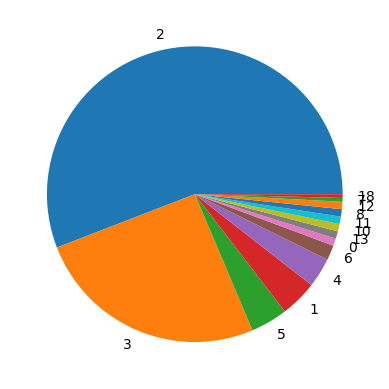

In [135]:
import matplotlib.pyplot as plt
import numpy as np

labels = [2,3,5,1,4,6,0,13,10,11,8,12,7,18]

plt.pie(df['Team Size'].value_counts(), labels=labels)
plt.show()

In [139]:
df.to_csv('Company Data', index=False)